# Interactive basis plaything

In [19]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib notebook

from madminer.morphing import MadMorpher

## Settings

In [47]:
n_bases = 1
n_resolution = 50

n_frames = 200

## Preparation

In [48]:
morpher = MadMorpher(parameter_max_power=[4,4],
                     parameter_range=[(-1.,1.), (-1.,1.)],
                     max_overall_power=4,
                     n_bases=n_bases)

In [49]:
xi = np.linspace(-1.,1.,n_resolution)
yi = np.linspace(-1.,1.,n_resolution)
xx, yy = np.meshgrid(xi, yi)
xx = xx.reshape((-1,1))
yy = yy.reshape((-1,1))
theta_evaluation = np.hstack([xx, yy])

## Basis evaluation

In [50]:
def evaluate_basis(basis=None):
    
    # Optimization
    if basis is None:
        basis = morpher.find_basis_simple()

    # Evaluate basis
    squared_weights = []

    for theta in theta_evaluation:
        wi = morpher._calculate_morphing_weights(theta, basis)
        squared_weights.append(np.sum(wi*wi)**0.5)

    squared_weights = np.array(squared_weights).reshape((n_resolution,n_resolution))
    
    return squared_weights

## Trajectories

In [51]:
n = morpher.n_benchmarks

theta_min = -1. + 2.*np.random.rand(morpher.n_benchmarks,2)
theta_max = -1. + 2.*np.random.rand(morpher.n_benchmarks,2)
theta_phase = 2.*np.pi*np.random.rand(morpher.n_benchmarks,2)

In [52]:
def calculate_basis(t):
    basis = 0.5 * (
        (theta_max + theta_min)
        + (theta_max - theta_min)
        * np.sin(2.*np.pi * t / n_frames + theta_phase)
    )
    return basis

In [53]:
basis = calculate_basis(0)

squared_weights = evaluate_basis(basis)

## Animatino

In [54]:
def update(t):
    basis = calculate_basis(t)
    squared_weights = evaluate_basis(basis)
    
    scatter.set_offsets(basis)
    pcm.set_array(squared_weights.flatten())
    

<IPython.core.display.Javascript object>


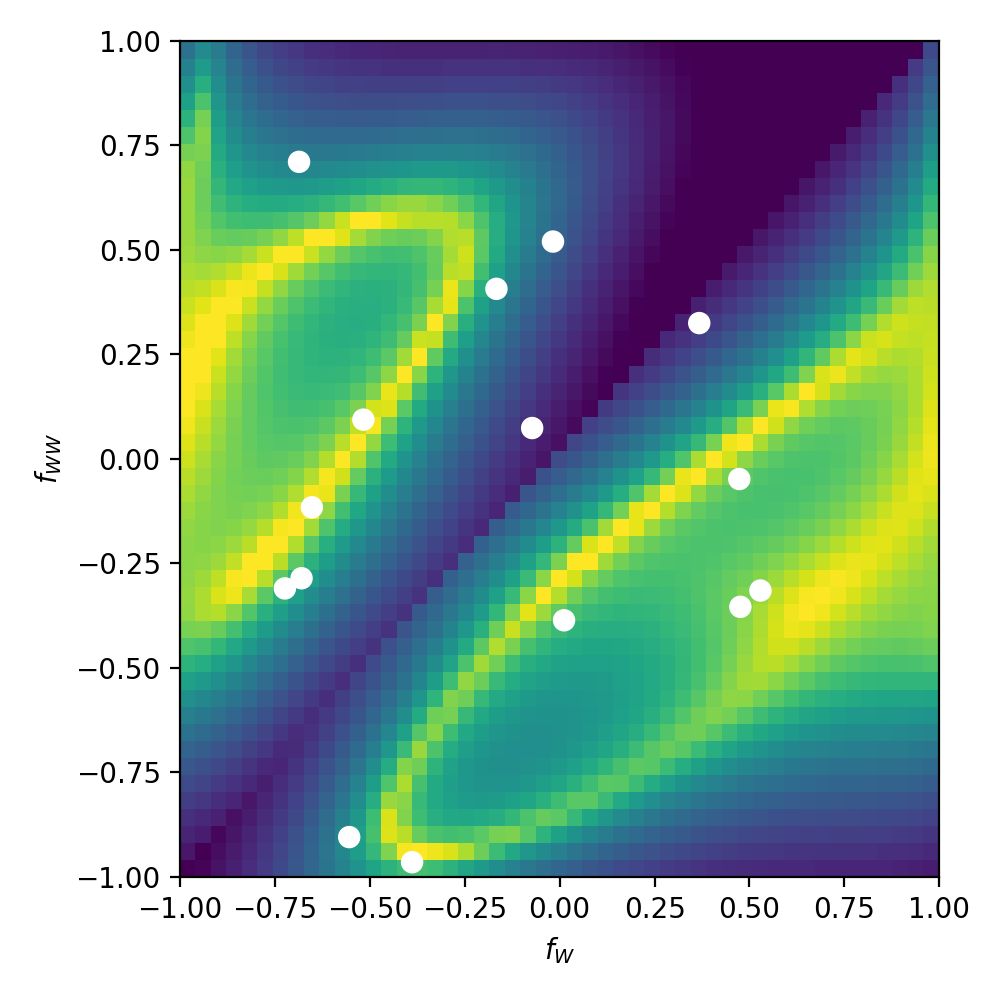

In [55]:
fig = plt.figure(figsize=(5.,5))
ax = plt.gca()

colors = []
for c in ['white', 'black', 'yellow', 'green', 'blue', 'red'][:morpher.n_bases]:
    colors += [c] * morpher.n_components

pcm = ax.pcolormesh(xi, yi, squared_weights,
                   norm=matplotlib.colors.LogNorm(vmin=1., vmax=1.e2),
                   cmap='viridis_r')
#cbar = fig.colorbar(pcm, ax=ax, extend='both')

scatter = plt.scatter(basis[:,0], basis[:,1], s=50., c=colors)

plt.xlabel(r'$f_W$')
plt.ylabel(r'$f_{WW}$')
#cbar.set_label(r'$\sqrt{\sum w_i^2}$')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)

plt.tight_layout()

anim = FuncAnimation(fig, update, frames=np.arange(0, 250), interval=200)
anim.save('test.gif', dpi=150, writer='imagemagick')
